In [0]:
import numpy as np
import pandas as pd
import re
from tqdm import tqdm
import os

from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im

import seaborn as sns
import matplotlib.pyplot as plt



In [0]:
df = pd.read_csv('../../gen/analysis/temp/preclean.csv', sep = ',')
print(df.head())
print('Plotting means...')

100%|██████████| 6/6 [00:00<00:00, 55.16it/s]


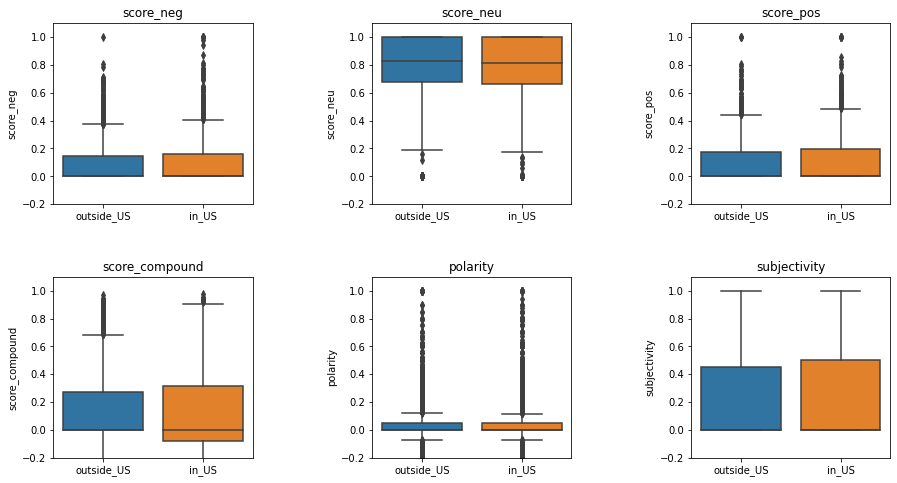

In [6]:

fig, ax= plt.subplots(2,3,figsize=(15,8))
plt.subplots_adjust(hspace=0.4,wspace=0.6)
i=0
j=0
for criterion in tqdm(df.columns[6:]):
  # print(i,j)
  sns.boxplot(y=criterion,x='in_US', data=df,ax=ax[i,j])
  ax[i,j].set_ylim((-0.2,1.1))
  ax[i,j].set_xticklabels(['outside_US','in_US'])
  ax[i,j].set_xlabel('')
  ax[i,j].set_title(criterion)
  j+=1
  if j==3:
    i+=1
    j=0

# plt.savefig('../../output_figures/mean_comparison.png', bbox_inches = "tight")

 67%|██████▋   | 4/6 [00:00<00:00, 32.59it/s]

Plotting density...


100%|██████████| 6/6 [00:00<00:00, 33.41it/s]


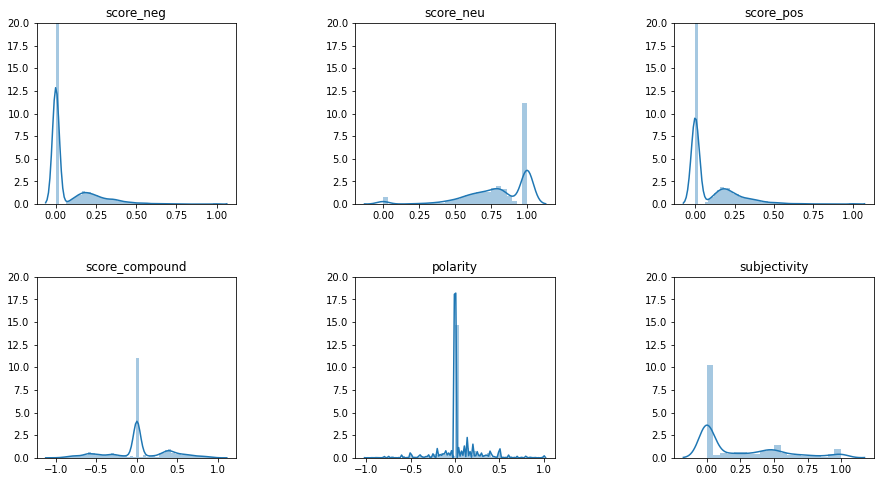

In [8]:
print('Plotting density...')
fig, ax= plt.subplots(2,3,figsize=(15,8))
plt.subplots_adjust(hspace=0.4,wspace=0.6)
i=0
j=0
for criterion in tqdm(df.columns[6:]):
  # print(i,j)
  sns.distplot(df[criterion], norm_hist=True, ax=ax[i,j])
  ax[i,j].set_ylim((0,20))
  # ax[i,j].set_xticklabels(['outside_US','in_US'])
  ax[i,j].set_xlabel('')
  ax[i,j].set_title(criterion)
  j+=1
  if j==3:
    i+=1
    j=0

plt.savefig('../../output_figures/density.png', bbox_inches = "tight")

In [9]:
print('Plotting a word cloud...')
raw_tweets=[]
for tweet in df['text_eng']:
  raw_tweets.append(tweet)
raw_tweets=[tweet for tweet in raw_tweets if type(tweet)==str]

raw_string = ''.join(raw_tweets)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)


words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 2]  # ignore a, an, be, ...
words = [w.lower() for w in words]
words = [w for w in words if w not in STOPWORDS]
words = ['coronavirus' if word =='coronaviru' else word for word in words]
words = ['Trump' if word =='tramp' else word for word in words]


mask = np.array(Image.open('../../src/analysis/trump2.png'))
wc = WordCloud(background_color="white", max_words=2000, mask=mask)
clean_string = ','.join(words)
wc.generate(clean_string)


f = plt.figure(figsize=(25,25))

plt.imshow(wc, interpolation='bilinear')
plt.title('Tweets Cloud')
plt.axis("off")
plt.show()

plt.savefig('../../output_figures/tweets_cloud.png', bbox_inches = "tight")

Plotting a word cloud...


FileNotFoundError: ignored